# Edged vortex

To obtain an edged vortex magnetisation field, we simulate a disk with $100 \,\text{nm}$ diameter. It consists of only one layer with $30 \,\text{nm}$ thickness.

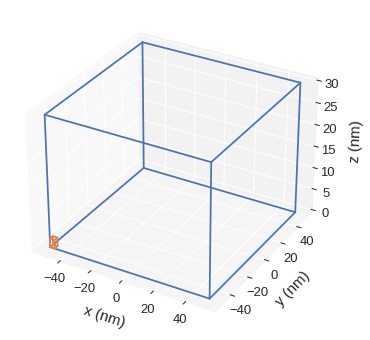

In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as mc

# FeGe paratemeters
A = 8.78e-12  # J/m
D = 1.58e-3  # J/m2
Ms = 3.84e5  # A/m
alpha = 0.28

# Geometry parameters
d = 102e-9  # disk diameter (m)
thickness = 30e-9  # thickness (m)

cell = (3e-9, 3e-9, 2e-9)  # discretisation cell size (m)

region = df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, thickness))
mesh = df.Mesh(region=region, cell=cell)

mesh.mpl()

We pass disk geometry via `norm`:

In [2]:
def disk_function(point):
    x, y, z = point
    if x**2 + y**2 < (d/2)**2:
        return Ms
    else:
        return 0
    
m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=disk_function)  # initial magnetisation state

Now, we define system object with energy equation which constains:

- Exchange
- DMI
- Demagnetisation

In [3]:
system = mm.System(name='vortex_field')
system.energy = mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='T') + mm.Demag()
system.m = m
system.energy

Exchange(A=8.78e-12) + DMI(D=0.00158, crystalclass='T') + Demag()

Finally, we relax the system:

In [4]:
md = mc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2021/02/17 16:51]... (2.6 s)


Top view of magnetisation field:

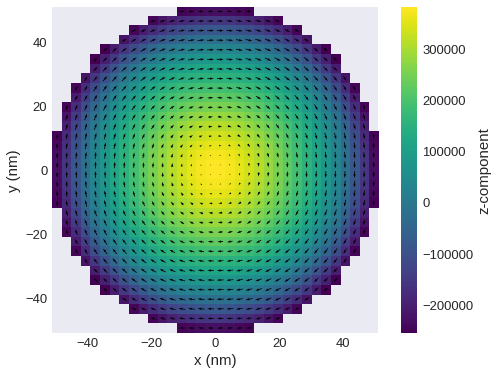

In [5]:
m.plane('z').mpl()

Cross section of magnetisation field:

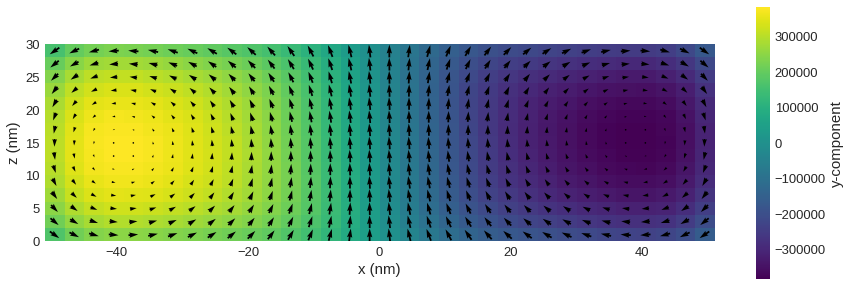

In [6]:
m.plane('y').mpl(figsize=(15, 5), vector_scale=2e7)

We save the field in numpy file format:

In [7]:
import numpy as np
np.save('edged-vortex.npy', system.m.array)